In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

# Проверка статистиских гипотез

## Определения
*Статистическая гипотеза* -- всякое предположение о свойстве выборочной совокупности $X=\{x_1, ..., x_n\}$

*Статистика* -- это функция от выборки $S(X) = S(x_1,...,x_n)$

1. $S(x) = \frac{x_1 + ... + x_n}{n}$
2. $S(X) = max(x_i), i=1,n$

Величина S - случайная величина с n факторами $\{S_1,...,S_n\}$ -- совокупность значений статистики S, $S_i \in R^1$

Из этого следует, что статисктика одномерная случайная величина $f_s(t)$ - плотность распределения $F_s(t)$ - распредение

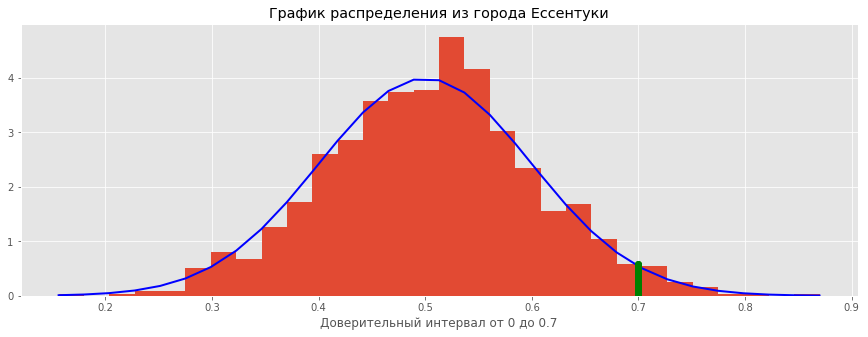

In [3]:
mu, sigma = 0.5, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
plt.plot(bins, y, linewidth=2, color='b')
plt.plot([0.7]*60,  np.arange(0.0, 0.6, 0.01), 'og' , linewidth=2)
plt.title('График распределения из города Ессентуки')
plt.xlabel('Доверительный интервал от 0 до 0.7')
plt.show()

Критерий стат. гипотезы - некое суждение о распределении статистики $S$

Правила:

1. Фиксируется и задается уровень значимости $a$
2. Находится $t_{critical}$
3. Вычисляется $S_0=S(X^0)$ 
4. Если $S_0$ попала в доверительную область - то гипотеза подтверждена, иначе гипотеза опровергнута

Допустим имеются две гипотезы, которые принято называть:

* $H_0$ - основная гипотеза
* $H_1$ - альтернативная гипотеза

Среди этих двух гипотез нужно выбрать наиболее правильную. Если $H_0$ не верна, т.е. верна $H_1$, то распределение $f{^1}{_s} \neq f{_s}{^0}$

Мощность критерия при проверке гипотез $H_0, H_1$ это число $1-\beta$, она показывает на сколько уверенно критерий разделяет $H_0$ и $H_1$

## Критерий Пирсона
Проверяет равенство выборочной плотности распределения и теоретической плотности 
$$H_0: f_{выб}(x) = f_{теор}(x)$$
$$H_1: f_{выб}(x) = f^2_{теор}(x)$$

Возможны две ошибки при проверке гипотез:
1. Гипотеза справедлива, но опровергнута
2. Гипотеза ошибочна, но принята



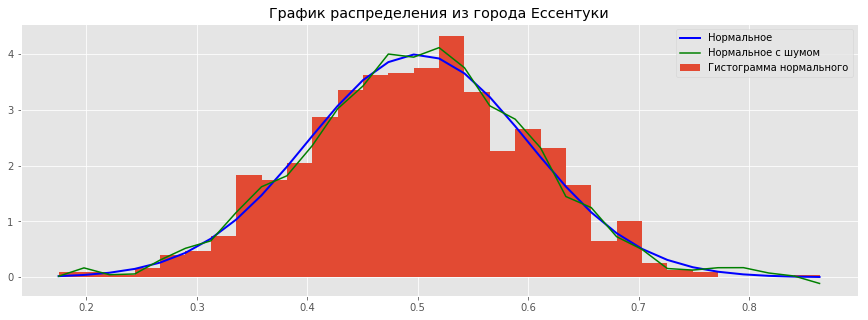

In [4]:
mu, sigma = 0.5, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
plt.plot(bins, y, linewidth=2, color='b')
plt.plot(bins, [i+np.random.uniform(-0.2, 0.2) for i in y], color='g')
plt.title('График распределения из города Ессентуки')
plt.legend(['Нормальное', 'Нормальное с шумом', 'Гистограмма нормального'])
plt.show()

$\chi^2_m = \sum_{x=1}^m \frac{(\tau_k^{теор} - \tau_k^{выб})^2}{\tau_k^{теор}}$, 
где $k$ - номер кармана $(C_{k-1}, C_k]$

$\tau_k^{выб}$ - частота попадания в $k$ - карман

$$\tau_k^{теор} = n * \int_{С_{k-1}}^{C_k} f_{теор}(x)dx; \tau_k^{выб} \geqslant \delta \forall k$$



Статистика имееет распределение равное $\chi^2_{n-1} = \frac{N(0,1)^2 + ... + N(0,1)^2}{m-1}$

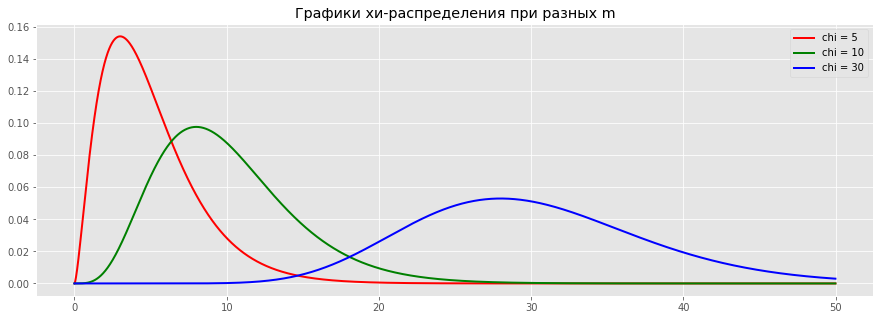

In [7]:
import scipy.stats as stats

norm = stats.norm(0, 1)

x1 = norm.rvs(size=100000)**2
x2 = norm.rvs(size=100000)**2
x3 = norm.rvs(size=100000)**2

f = x1 + x2 + x3

# Plot the theoretical density of f
x = np.arange(0, 50, .01)
plt.plot(x, stats.chi2.pdf(x, df=5), color='r', lw=2)
plt.plot(x, stats.chi2.pdf(x, df=10), color='g', lw=2)
plt.plot(x, stats.chi2.pdf(x, df=30), color='b', lw=2)
plt.legend(['chi = 5', 'chi = 10', 'chi = 30'])
plt.title('Графики хи-распределения при разных m')
plt.show()